# PSTAT: plot basic statistics

Philipp Schlatter 2024

In [70]:
%matplotlib notebook
import sys
import numpy as np
import scipy.linalg as scla
import matplotlib.pyplot as plt
import math as mt
import matplotlib.pylab as pylab
import os
from chebdif import chebdif

In [76]:
# execute the script that in turn runs pxyst
os.system("./read_stat.sh xy.stat stat_vel.in  stat_vel.data");

 *******************************************************************
 *                                                                 *
 *                             Simson                              *
 *                        pxyst $Rev$                        *
 *                                                                 *
 *******************************************************************

 Give file to plot from
 A:    0.0000000000000000        0.0000000000000000        0.0000000000000000        0.0000000000000000     
 fltype=           1
 Channel/Couette: average over x? (yes 1, no 0)
         read           96  statistics                      for velocity and pressure
 compiled for           96  statistics                      for velocity and pressure
         read           44  statistics for scalar
 compiled for           44  statistics for scalar
 * time    338.53596717484970     
 * sumw    17.302254419537057     
 xl=    12.57 zl=     6.28 t=    338.5 re=   42

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO


ot:2/Red<uiSij>/dxj 
 -140     vis_dif mean:2/Red<ui><Sij>/dxj 
 -141     vis_dif fluct:2/Red<ui'Sij'>/dxj
 -(142-147) convection,tot:d<uluiuj>/dxl
 -(148-153) convection,mean:d(<ul><ui><uj>)/dxl
 -(154-159) convection,fluct:<ul>d<ui'uj'>/dxl
 -(160-165) molecular diffusion,tot:1/Re<d2uiuj/dxl2>
 -(166-171) molecular diffusion,mean:
 -(172-177) molecular diffusion,fluct:
 -(178-183) turbulent diffusion mean: 
 -(184-189) turbulentdiffusionfluct:-d<ui'uj'ul'>/dxl
 -(190-195) production -<ui'ul'>d<uj>/dxl
 -(196-201) v-p_gra,tot:-<uidp/dxj-ujdp/dxi>
 -(202-207) v-p_gra,mean:-<ui>d<p>/dxj-<uj>d<p>/dxi
 -(208-213) v-p_gra,fluct: -<ui'dp'/dxj>-<uj'dp'/dxi>
 -(214-218) (v-p)_gra,tot: -<dpui/dxj>-<dpuj/dxi>
 -(219-223) (v-p)_gra,mean:
 -(224-228) (v-p)_gra,fluct:-<dp'ui'/dxj>-<dp'uj'/dxi>
 -(229-234) p-strain rate,tot:2<p S_ij>
 -(235-240) p-strain rate,mean:2<p>< S_ij>
 -(241-246) p-strain rate,fluct:2<p'S_ij'> 
 -(247-252) dissipation eps,tot:-2/Re<dui/dxl duj/dxl>
 -(253-258) dissipation e

 8 screen and matlab file
 10 screen and table
 give file to write to
 choose filter
 0 no filter
 1 gaussian lowpass filter
 give type of plot
 1 xy contour plot
 2 f(x) at multiple y
 3 f(y) at multiple x
 give number of x-positions, max            5
give x-value for curve   1
 nearest plane x=   0.000 plane number   1
 give scaling
 0 scale with inflow freestream vel and displ thick
 1 scale with local freestream vel and displ thick
 2 scale with local wall units
 3 same as 1, and y scaled with local displ thick
 4 same as 2, and y scaled with local wall units
 5 same as 4, and divided by y+
 choose aspect ratio
 0 equal scale for vertical and horizontal
 1 largest possible picture (aspect ratio 1.6)
9#`u&Ccu>N2ohNlh&C#`uCcu2H2ohH*`&Cc>N#`u(D$l`D"f|'F-1.0
2lh(D1`}D#au-F$m`F"d|,I-0.5
2mh-F1a}F#cu2H$o`H"e|1K 0.0
2oh2H1c}H#au7K$m`K"g|6M 0.5
2mh7K1a}K#cu<M$o`M"e|;P 1.0
2oh<M1c}M#`u&CcuNol"C-1.0E-04
cu>NB'`j&CcjNoa"C-5.0E-05
cj>NB*`&CcNov

In [72]:
stat = np.loadtxt('stat_vel.data')
re=4200
y=stat[:,0]
ny=stat.shape[0]
y_,D_=chebdif(ny,1)
D=D_[0,:,:]

In [73]:
dudy = D@stat[:,1]
utau = np.sqrt((dudy[-1]-dudy[0])/2/re);
lstar = 1/utau/re;
retau = 1/lstar
print('Re=%.5f Retau=%.5f' % (re,retau) )

Re=4200.00000 Retau=189.05313


<IPython.core.display.Javascript object>


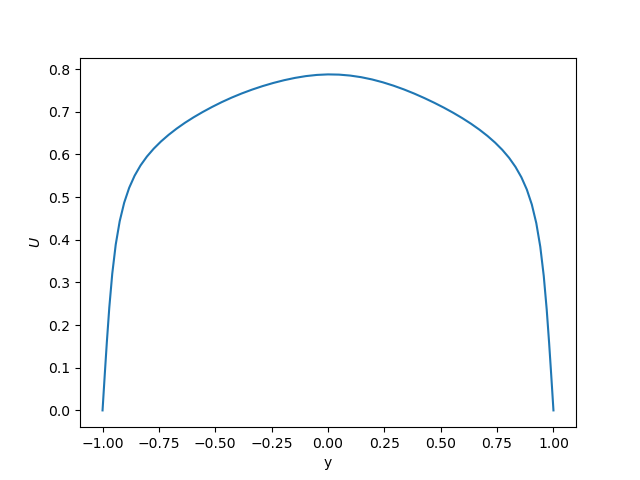

In [74]:
u = stat[:,1]
fig=plt.figure()
plt.plot(y,u)
plt.xlabel(r'y')
plt.ylabel(r'$U$')
plt.show()

<IPython.core.display.Javascript object>


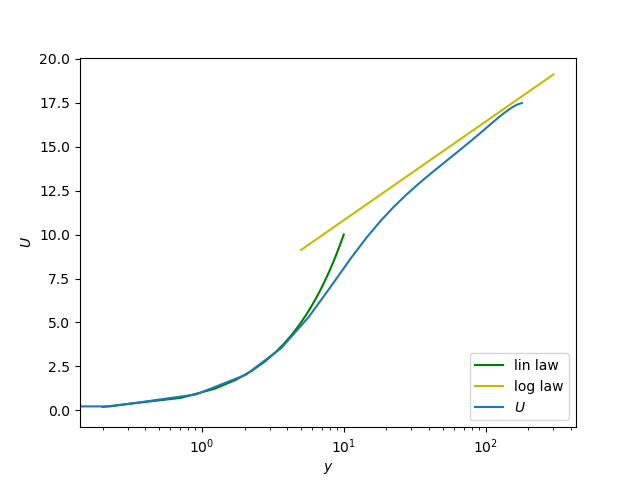

In [75]:
# compute uplus (including average over the two channel sides) and yplus
yp = (y[0:int(ny/2)]+1)/lstar
up = (u[0:int(ny/2)] + u[ny-1:int(ny/2):-1])/2/utau

fig=plt.figure()
# lin law
ypp=np.linspace(0.2,10,20);
plt.plot(ypp,ypp,'g',label='lin law')

# log law
ypp = np.linspace(5,300,20);
plt.plot(ypp,1/0.41*np.log(ypp)+5.2,'y',label='log law')

plt.semilogx(yp,up,label='$U$')
plt.xlabel(r'$y$')
plt.ylabel(r'$U$')

plt.legend(loc='lower right')

plt.show()